Importing libraries

In [4]:
import pandas as pd
import numpy as np
from pandas import read_csv

Choose data from local directory

In [5]:
from google.colab import files
uploaded = files.upload()

Saving salary.csv to salary.csv


Load dataset

In [6]:
dataset=read_csv('salary.csv')

summarizing dataset

In [7]:
print(dataset.shape)
print(dataset.head(5))

(32561, 5)
   age  education.num  capital.gain  hours.per.week income
0   90              9             0              40  <=50K
1   82              9             0              18  <=50K
2   66             10             0              40  <=50K
3   54              4             0              40  <=50K
4   41             10             0              40  <=50K


Mapping salary data to binary value

In [8]:
Income_set = set(dataset['income'])
Income_set
dataset['income'] = dataset['income'].map({'<=50K':0 , '>50K':1}).astype(int)
print(dataset.head)

<bound method NDFrame.head of        age  education.num  capital.gain  hours.per.week  income
0       90              9             0              40       0
1       82              9             0              18       0
2       66             10             0              40       0
3       54              4             0              40       0
4       41             10             0              40       0
...    ...            ...           ...             ...     ...
32556   22             10             0              40       0
32557   27             12             0              38       0
32558   40              9             0              40       1
32559   58              9             0              40       0
32560   22              9             0              20       0

[32561 rows x 5 columns]>


Segrigate dataset into x and y

In [9]:
X=dataset.iloc[:,:-1].values
X

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]])

In [10]:
Y=dataset.iloc[:,-1].values
Y

array([0, 0, 0, ..., 1, 0, 0])

Split to train and test

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

feature scaling

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

finding best k-value

Text(0, 0.5, 'Mean error')

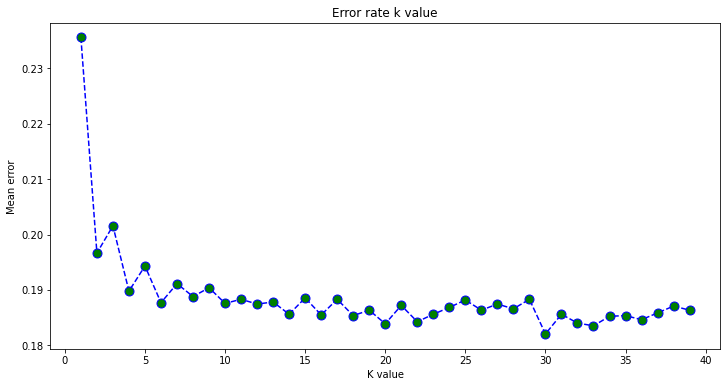

In [13]:
error = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


for i in range(1,40):
  model = KNeighborsClassifier(n_neighbors = i)
  model.fit(X_train,Y_train)
  predict_i = model.predict(X_test)
  error.append(np.mean(predict_i != Y_test))

plt.figure(figsize=(12,6))
plt.plot(range(1,40),error,color='blue',linestyle='dashed',marker='o',markerfacecolor='green',markersize=9)
plt.title('Error rate k value')
plt.xlabel('K value')
plt.ylabel('Mean error')



training

In [16]:
#from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 30, metric = 'minkowski', p = 2)
model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=30)

Prediction

In [20]:
age = int(input("Enter New Employee's Age: "))
edu = int(input("Enter New Employee's Education: "))
cg = int(input("Enter New Employee's Captital Gain: "))
wh = int(input("Enter New Employee's Hour's Per week: "))
newEmp = [[age,edu,cg,wh]]
result = model.predict(sc.transform(newEmp))
print(result)

if result == 1:
  print("Employee might got Salary above 50K")
else:
  print("Customer might not got  Salary above 50K")

Enter New Employee's Age: 29
Enter New Employee's Education: 7
Enter New Employee's Captital Gain: 0
Enter New Employee's Hour's Per week: 42
[0]
Customer might not got  Salary above 50K


Predict for all test data

In [18]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 0]]


Evaluating model

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_pred)

print("Confusion Matrix: ")
print(cm)

print("Accuracy of the Model: {0}%".format(accuracy_score(Y_test, y_pred)*100))

Confusion Matrix: 
[[5875  318]
 [1164  784]]
Accuracy of the Model: 81.79584817589976%
